In [1]:
# Open the .csv file and look at the first few rows

import pandas as pd
import numpy as np

estonia=pd.read_csv("estonia-passenger-list.csv")

estonia.head(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,1,Sweden,ARVID KALLE,AADLI,M,62,P,0
1,2,Estonia,LEA,AALISTE,F,22,C,0
2,3,Estonia,AIRI,AAVASTE,F,21,C,0
3,4,Sweden,JURI,AAVIK,M,53,C,0
4,5,Sweden,BRITTA ELISABET,AHLSTROM,F,55,P,0


In [7]:
# Look at the last few rows

estonia.tail(5)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [3]:
# Search for missing data 

estonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  989 non-null    int64 
 1   Country      989 non-null    object
 2   Firstname    989 non-null    object
 3   Lastname     989 non-null    object
 4   Sex          989 non-null    object
 5   Age          989 non-null    int64 
 6   Category     989 non-null    object
 7   Survived     989 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 42.6+ KB


In [4]:
# Checking the last row of the data

estonia.tail(10)

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
979,980,Denmark,KNUD,OQLLGAARD,M,67,P,0
980,981,Sweden,GUNHILD ANNA-LISA,OMAR,F,54,P,0
981,982,Sweden,LARS TORSTEN,OSTERBERG,M,48,P,1
982,983,Sweden,MAUD HELENA,QSTERVALL,F,24,P,0
983,984,Sweden,GUNNEL MARIE,OSTLUND,F,51,P,0
984,985,Sweden,ANNA INGRID BIRGITTA,OSTROM,F,60,P,0
985,986,Sweden,ELMAR MIKAEL,OUN,M,34,P,1
986,987,Sweden,ENN,QUNAPUU,M,77,P,0
987,988,Sweden,LY,GUNAPUU,F,87,P,0
988,989,Sweden,CARL,OVBERG,M,42,P,1


In [8]:
estonia.isnull()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category,Survived
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
984,False,False,False,False,False,False,False,False
985,False,False,False,False,False,False,False,False
986,False,False,False,False,False,False,False,False
987,False,False,False,False,False,False,False,False


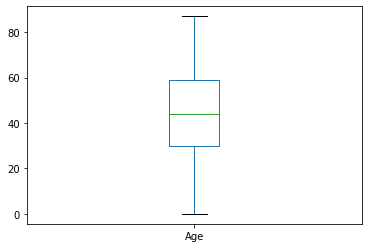

In [10]:
# Check for whether there are any outliers in the age

estonia.Age.plot(kind = 'box')

### Exploring gender numbers

Text(0, 0.5, 'Numbers')

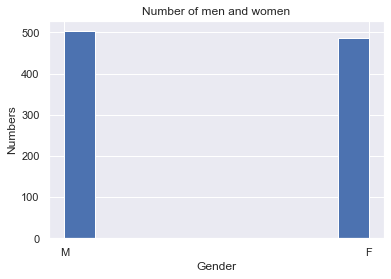

In [10]:
# Results above show that there are no outliers so we can safely evaluate the data
# Graph how many of the passengers were women and how many were men


gender=np.array(estonia['Sex'])

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(gender)
plt.title("Number of men and women")
plt.xlabel("Gender")
plt.ylabel("Numbers")

In [13]:
# Finding the number of men and women in the ship

estonia.groupby("Sex").count()

,PassengerId,Country,Firstname,Lastname,Age,Category,Survived
Sex,,,,,,,
F,486,486,486,486,486,486,486
M,503,503,503,503,503,503,503


In [15]:
estonia["Sex"].count()

989

In [4]:
#Number of men and women who survived

estonia.groupby("Sex")[["Survived"]].sum()

,Survived
Sex,
F,27
M,110


In [3]:
estonia.groupby("Survived").count()

,PassengerId,Country,Firstname,Lastname,Sex,Age,Category
Survived,,,,,,,
0,852,852,852,852,852,852,852
1,137,137,137,137,137,137,137


Text(0, 0.5, 'Numbers')

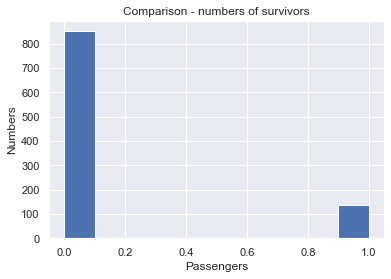

In [2]:
# Number of those did not survive verses those who survive

survive=np.array(estonia['Survived'])

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(survive)
plt.title("Comparison - numbers of survivors")
plt.xlabel("Passengers")
plt.ylabel("Numbers")

### Exploring Age

Text(0, 0.5, 'Numbers')

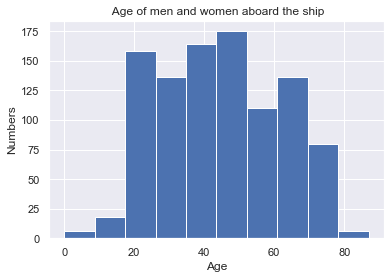

In [8]:
# Make a graph representing the age

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

age=np.array(estonia["Age"])

plt.hist(age)
plt.title(" Age of men and women aboard the ship")
plt.xlabel("Age")
plt.ylabel("Numbers")

In [33]:
# Find the mean age of all the passengers
estonia.Age.median()

44.0

In [25]:
# Find the mean age of all the passengers
estonia.Age.mean()

44.575328614762384

In [5]:
# Find the mean age of men and women in the ship
estonia.groupby("Sex")[["Age"]].mean()

,Age
Sex,
F,45.518519
M,43.664016


In [38]:
# Find the mean age of the survivors

estonia.groupby("Survived")["Age"].aggregate(["mean","median"])

,mean,median
Survived,,
0,46.273474,46.5
1,34.014599,32.0
